In [2]:
import pandas as pd
import os
import numpy as np
from datetime import datetime
import timeit
import matplotlib.pyplot as plt
 
# fix random seed for reproducibility
np.random.seed(7)
path = os.getcwd()



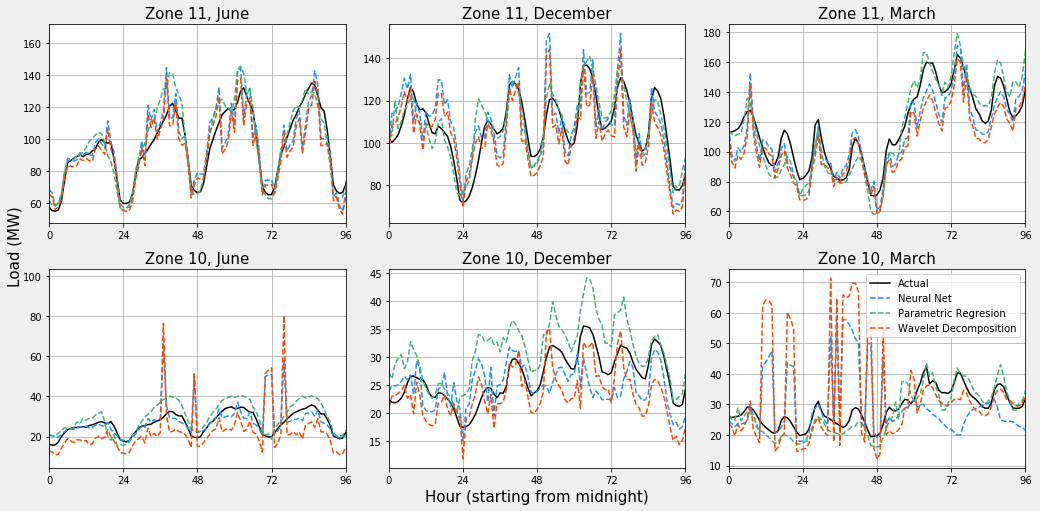

In [296]:
gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize = (3*5,1.5*5))
fig.patch.set_facecolor(grey_color_rgbs)

ax = fig.add_subplot(111) 
ax.set_ylabel('Load (MW)',fontsize = 15)
ax.set_xlabel('Hour (starting from midnight)',fontsize = 15)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor=grey_color_rgbs, top='off', bottom='off', left='off', right='off')


#ax.plot([0],linestyle = '-',label = 'Actual')
#ax.plot([0],linestyle = '--',label = 'Neural Net')
#ax.plot([0],linestyle = '--',label = 'Parametric Regresion')
#ax.legend(fontsize = 15)

ax.patch.set_facecolor(grey_color_rgbs)

month_dict = {3 : 'March',
             12 : 'December',
             6 : 'June'}

zones = [11,10]
for j in range(len(zones)):
    
    zone = zones[j]
    base_data = pd.read_csv(path + '/NN_inputs/Neural_results_z{}' + str(zone) + '.csv')
    wave_data = pd.read_csv(path + '/NN_inputs/wavelet_prediction_z{}.csv'.format(str(zone)))
    par_data = pd.read_csv(path + '/NN_inputs/parametric_prediction_z{}.csv'.format(str(zone)))
    
    ''' 
    actual = np.array(base_data['actual'])[:(3*168)] / 1000
    neural = np.array(base_data['predicted_NN'])[:(3*168)] / 1000
    parametric = np.array(par_data['predicted'])[:(3*168)] / 1000
    wavelet = np.array(wave_data['predicted_NN'])[:(3*168)] / 1000
    
    '''
    
    df = base_data[['year','month','day','hour','actual','predicted_NN']]
    df = df.rename(columns={'predicted_NN':'predicted_NN_basic'})
    
    wave_data = wave_data[['year','month','day','hour','predicted_NN']]
    df = df.merge(right = wave_data,on = ['year','month','day','hour'])
    df = df.rename(columns={'predicted_NN':'predicted_NN_wavelet'})
    parametric = par_data[['Year','Month','Day','Hour','predicted']]  
    df = df.merge(right = parametric,left_on = ['year','month','day','hour'],
                 right_on = ['Year','Month','Day','Hour']) 
    
    months = [6,12,3]
    for i in range(len(months)) :
        #print(zone,week) 
        ax = fig.add_subplot(gs[j,i])
        
        ''' 
        plt.plot(actual,color='k',linestyle = '-',label = 'actual')
        plt.plot(neural,color='dodgerblue',linestyle = '--',label = 'neural')
        plt.plot(parametric,color='MediumSeaGreen',linestyle = '--',label = 'parametric')
        plt.plot(wavelet,color='OrangeRed',linestyle = '--',label = 'wavelet')
        '''
        
        temp_df = df[df['month'] == months[i]]
        temp_df.index = range(len(temp_df))
        
        plt.plot(temp_df['actual']/1000,color='k',linestyle = '-',label = 'Actual')
        plt.plot(temp_df['predicted_NN_basic']/1000,color='DodgerBlue',linestyle = '--',label = 'Neural Net')
        plt.plot(temp_df['predicted']/1000,color='MediumSeaGreen',linestyle = '--',label = 'Parametric Regresion')
                     
        plt.plot(temp_df['predicted_NN_wavelet']/1000,color='OrangeRed',linestyle = '--',
                 label = 'Wavelet Decomposition')

        

        #min_day = 7*week 
        #max_day = 7*week + 4

        ax.set_xlim((0,96))
        ax.set_xticks(np.arange(0,96+1,24))
        #ax.set_xticklabels([])
        ax.grid()
        #ax.set_xlabel('hour',fontsize = 15)
        #ax.set_ylabel('load (MW)',fontsize = 15)
        ax.set_title('Zone ' + str(zone) +", " + month_dict[months[i]],fontsize = 15)
        
plt.legend()
plt.tight_layout()
plt.show() 


In [71]:
days_list_base = []

for i in range(len(base_data)) :
    days_list_base.append(str(base_data['year'].iloc[i]) + '_' 
                          +str(base_data['month'].iloc[i]) + '_'
                          +str(base_data['day'].iloc[i]) + '_' 
                          +str(base_data['hour'].iloc[i]))
    
days_list_par = []

for i in range(len(par_data)) :
    days_list_par.append(str(par_data['Year'].iloc[i]) + '_'+
                         str(par_data['Month'].iloc[i]) + '_'+
                         str(par_data['Day'].iloc[i]) + '_' +
                         str(par_data['Hour'].iloc[i]))

In [195]:
np.unique(df['month'])

array([ 2,  3,  5,  6,  8,  9, 11, 12])

In [237]:
i

4

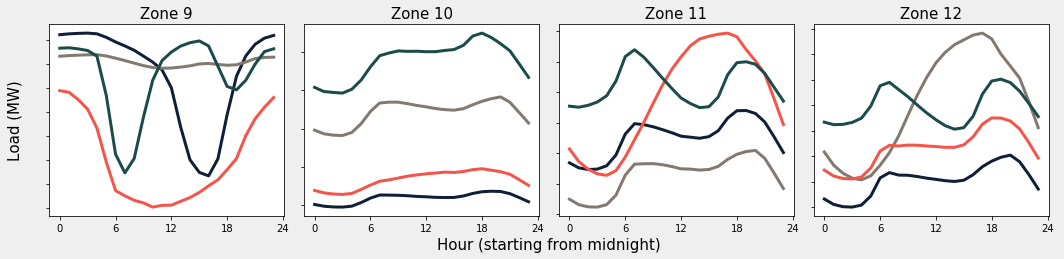

In [265]:
##kmeans thing

import sklearn.cluster
import string
import matplotlib.gridspec as gridspec

grey_color_rgbs = (239/255,239/255,239/255) 

gs = gridspec.GridSpec(1, 4)
fig = plt.figure(figsize = (15,4)) 
fig.patch.set_facecolor('#efefefff')

def replace_fun(x) :
    try :
        return(int(x.replace(',','')))
    except :
        return(x)


df.apply(lambda x : replace_fun(x))
data = pd.read_csv(path + '/GEFCOM/Load_history.csv')

ax = fig.add_subplot(111) 
ax.set_ylabel('Load (MW)',fontsize = 15)
ax.set_xlabel('Hour (starting from midnight)',fontsize = 15)
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_color('none')
ax.spines['left'].set_color('none')
ax.spines['right'].set_color('none')
ax.tick_params(labelcolor=grey_color_rgbs, top='off', bottom='off', left='off', right='off')

ax.patch.set_facecolor(grey_color_rgbs)


for zone in [9,10,11,12] :
    df = data[data['zone_id'] == zone] 
    df = df.drop(['zone_id','year','month','day'],axis=1)
    
    for col in df.columns :
        df[col] = df[col].apply(lambda x : replace_fun(x))
        
    df = df.dropna(axis=0)
  
    
    k_means = sklearn.cluster.KMeans(n_clusters = 4).fit(df)
    
    ax = fig.add_subplot(gs[0,zone-9])
    
    ax.patch.set_facecolor('white')
    
    ax.set_xticks(np.arange(0,25,6))
    
    i = 0
    colors_94 = {0:'#0F1F38',
             1:'#837970',
             2:'#F55449',  
             3:'#1B4B4A'}  
    
    colors_94 = {0:'##217CA3',
             1:'#E29930',
             2:'#32384D',  
             3:'#211F30'}  
        
    for row in k_means.cluster_centers_ :
        
        ax.plot(row/1000,color = colors[i],linewidth=3.0)
        ax.set_title('Zone ' + str(zone),fontsize = 15)
        ax.set_yticklabels([])
        i +=1 

plt.tight_layout()
plt.savefig('load_zone_kmeans.png',transparent = True)
plt.show()